!pip install yfinance #Caso seja necessário instalar a biblioteca

In [41]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import yfinance as yf #API do yahoo finance para obtenção dos dados dos ativos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from matplotlib.dates import DateFormatter


##Importando os ativos via Yahoo Finance

Para essa análise foram selecionados os ativos Petrobras (PETR4.SA), Commoditie barril de petróleo Brent Crude (BZ=F), referência para mercados europeus e asiáticos e nacional e câmbio Real-Dólar (BRL=X).

O período analisado foi de 21/07/2022 até 17/07/2023 (segunda-feira)

In [42]:
# Obtendo os dados da Petrobras
petrobras = yf.download("PETR4.SA", start="2022-07-01", end="2023-07-18")
petrobras = petrobras.reset_index()

# Obtendo os dados da comanditei de Brent Crude
commodities = yf.download("BZ=F", start="2022-07-01", end="2023-07-18")
commodities = commodities.reset_index()

# Obtendo os dados da taxa de câmbio USD/BRL
dolar = yf.download("BRL=X", start="2022-07-01", end="2023-07-18")
dolar = dolar.reset_index()

# Índice da Bolsa brasileira(B3)
b3 = yf.download("B3SA3.SA", start="2022-07-01", end="2023-07-18")
b3 = b3.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
# Criação de 2 Médias móveis para os ativos, 7 dias e 14 dias.
# Petrobras
petrobras["MM7_petro"] = petrobras["Adj Close"].rolling(window=7).mean()
petrobras["MM14_petro"] = petrobras["Adj Close"].rolling(window=14).mean()
# Barril de Petróleo
commodities["MM7_barril"] = commodities["Adj Close"].rolling(window=7).mean()
commodities["MM14_barril"] = commodities["Adj Close"].rolling(window=14).mean()
# Dólar
dolar["MM7_dolar"] = dolar["Adj Close"].rolling(window=7).mean()
dolar["MM14_dolar"] = dolar["Adj Close"].rolling(window=14).mean()
# B3
b3["MM7_b3"] = b3["Adj Close"].rolling(window=7).mean()
b3["MM14_b3"] = b3["Adj Close"].rolling(window=14).mean()

In [44]:
# Juntando os dataframes pela coluna de data
df = pd.merge(petrobras, commodities, on='Date', how='inner')
df = pd.merge(df, dolar, on='Date', how='inner')
df = pd.merge(df, b3, on='Date', how='inner')

<ipython-input-44-815edb2b267f>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Volume_x', 'High_x', 'Low_x', 'Open_x', 'Close_x', 'Adj Close_x'} in the result is deprecated and will raise a MergeError in a future version.


In [45]:
# Removendo os dados dos 13 primeiros dias (NaN) para remover para que os valores da média móvel não esteja ausente.
df = df.iloc[13:]

In [46]:
# Renomeando as colunas
df.columns = ["date", "open_petro", "high_petro", "low_petro", "close_petro", "adjclose_petro", "volume_petro", "MM7_petro", "MM14_petro",
                   "open_barril", "high_barril", "low_barril", "close_barril","adjclose_barril", "volume_barril",  "MM7_barril",	"MM14_barril",
                   "open_dolar", "high_dolar", "low_dolar", "close_dolar","adjclose_dolar", "volume_dolar", "MM7_dolar",	"MM14_dolar",
                   "open_b3", "high_b3", "low_b3", "close_b3","adjclose_b3", "volume_b3", "MM7_b3",	"MM14_b3"]


In [47]:
# Removendo colunas desnecessárias
df.drop(columns = ["open_petro","high_petro","low_petro","close_petro","volume_petro",
                   "open_b3","high_b3","low_b3","close_b3","volume_b3",
                   "open_barril","high_barril","low_barril","close_barril","volume_barril",
                   "open_dolar","high_dolar","low_dolar","close_dolar", "volume_dolar"], inplace=True)

Criamos uma coluna 'variation' para comparar a variação(em %) do valor do i-ésimo com o dia anterior.

In [49]:
df['variation'] = df['adjclose_petro'].pct_change() * 100
# Preenche o valor NaN na primeira linha com 0
df['variation'].fillna(0, inplace=True)

Criamos uma coluna para comparar o valor do i-ésimo com o dia anterior. Caso o valor do dia for superior que o anterior a coluna 'oscilation' recebe 1, se for inferior recebe 0.

In [50]:
df['oscilation'] = 0
df.loc[df['adjclose_petro'] > df['adjclose_petro'].shift(), 'oscilation'] = 1


In [51]:
df.drop(columns = ['MM7_barril', 'MM14_barril','MM7_dolar', 'MM14_dolar','MM7_b3', 'MM14_b3'])

,date,adjclose_petro,MM7_petro,MM14_petro,adjclose_barril,adjclose_dolar,adjclose_b3,variation,oscilation
13,2022-07-21,17.270733,16.975718,16.947661,103.860001,5.4702,10.681256,0.000000,0
14,2022-07-22,17.455223,17.067538,16.955738,103.199997,5.4978,10.399916,1.068225,1
15,2022-07-25,18.270554,17.340448,17.069238,105.150002,5.4967,10.409616,4.670983,1
16,2022-07-26,18.455046,17.599756,17.211220,104.400002,5.3563,10.409616,1.009778,1
17,2022-07-27,18.657389,17.833557,17.333222,106.620003,5.3501,10.555138,1.096410,1
...,...,...,...,...,...,...,...,...,...
247,2023-07-11,29.150000,29.741428,30.192143,79.400002,4.8982,13.930000,-1.353637,0
248,2023-07-12,29.170000,29.611428,30.029286,80.110001,4.8515,14.250000,0.068612,1
249,2023-07-13,29.629999,29.537143,29.991429,81.360001,4.8169,14.560000,1.576959,1
250,2023-07-14,29.049999,29.385714,29.863571,79.870003,4.7948,14.450000,-1.957475,0


In [52]:
# Movendo as duas últimas colunas ,'variation' e 'oscilation', para o início do dataframe.
colunas = list(df.columns)
for i in range(len(colunas)):
  colunas.insert(2, colunas.pop(colunas.index(df.columns[-1])))
  df = df[colunas]

In [12]:
# Baixando os dataset final
df.to_csv('petrobras.csv', index=False)

In [16]:
df_final = pd.read_csv("/content/df.csv")

In [20]:
df_final['variation_petro'] = df_final['resp'].pct_change() * 100
# Preenche o valor NaN na primeira linha com 0
df_final['variation_petro'].fillna(0, inplace=True)
df_final['variation_inversa'] = df_final['inversa'].pct_change() * 100
# Preenche o valor NaN na primeira linha com 0
df_final['variation_inversa'].fillna(0, inplace=True)
df_final['variation_logistica'] = df_final['logstica'].pct_change() * 100
# Preenche o valor NaN na primeira linha com 0
df_final['variation_logistica'].fillna(0, inplace=True)
df_final['variation_identidade'] = df_final['identidade'].pct_change() * 100
# Preenche o valor NaN na primeira linha com 0
df_final['variation_identidade'].fillna(0, inplace=True)

In [32]:
df_final['oscilation'] = 0
df_final.loc[df_final['resp'] > df_final['resp'].shift(), 'oscilation'] = 1
df_final['oscilation_inv'] = 0
df_final.loc[df_final['inversa'] > df_final['inversa'].shift(), 'oscilation_inv'] = 1
df_final['oscilation_log'] = 0
df_final.loc[df_final['logstica'] > df_final['logstica'].shift(), 'oscilation_log'] = 1
df_final['oscilation_id'] = 0
df_final.loc[df_final['identidade'] > df_final['identidade'].shift(), 'oscilation_id'] = 1


In [35]:
df_final.tail()

,date,resp,inversa,logstica,identidade,variation_petro,variation_inversa,variation_logistica,variation_identidade,oscilation,oscilation_inv,oscilation_log,oscilation_id
234,2023-07-11,29.150000,30.125115,30.008805,29.668550,-1.353637,-0.557952,-0.558673,-0.265873,0,0,0,0
235,2023-07-12,29.170000,30.338152,30.074582,29.691739,0.068612,0.707175,0.219194,0.078161,1,1,1,1
236,2023-07-13,29.629999,30.589964,30.163035,29.746498,1.576959,0.830018,0.294111,0.184427,1,1,1,1
237,2023-07-14,29.049999,30.389412,30.040755,29.631718,-1.957475,-0.655612,-0.405397,-0.385861,0,0,0,0
238,2023-07-17,28.990000,30.281073,29.990918,29.530827,-0.206539,-0.356505,-0.165899,-0.340485,0,0,0,0


## Gráficos


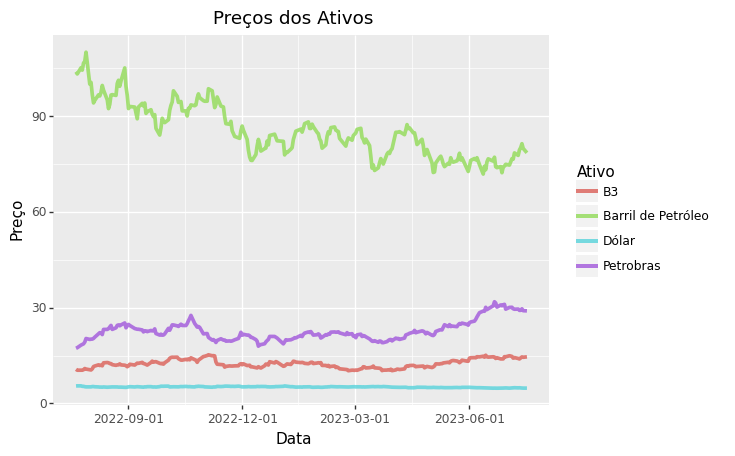

In [78]:
#"SIMULANDO O GGPLOT2"
from plotnine import ggplot, aes, geom_line, labs, scale_x_date, theme, theme_minimal, scale_color_manual, theme_grey

# Supondo que você já tenha um DataFrame chamado 'df' com as colunas desejadas
data = df.filter(["date","adjclose_petro", "adjclose_barril", "adjclose_dolar", "adjclose_b3"])
data.columns = ["date", "Petrobras", "Barril de Petróleo", "Dólar", "B3"]
melted_data = data.melt(id_vars='date', var_name='ativo', value_name='value')

# Cria o gráfico utilizando o ggplot
plot = ggplot(melted_data)

# Define as variáveis x, y e a estética (cor) para cada linha
plot += aes(x='date', y='value', color='ativo')

# Adiciona as linhas ao gráfico
plot += geom_line(size=1.5, alpha=0.8)

# Personalizações do gráfico
plot += labs(title='Preços dos Ativos', x='Data', y='Preço')
plot += scale_x_date(date_breaks="3 months")
plot += theme_minimal()
plot += labs(color='Ativo')
plot += theme_grey()

# Exibe o gráfico
print(plot)


In [ ]:
plt.figure(figsize=(6, 7))

df_final['variation_petro'].hist(bins=25)
plt.xlabel('Retorno Diário')
plt.ylabel('Counts')
#plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 7))

df_final['variation_inversa'].hist(bins=25)
plt.xlabel('Retorno Diário')
plt.ylabel('Counts')
#plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 7))

df_final['variation_logistica'].hist(bins=25)
plt.xlabel('Retorno Diário')
plt.ylabel('Counts')
#plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 7))

df_final['variation_identidade'].hist(bins=25)
plt.xlabel('Retorno Diário')
plt.ylabel('Counts')
#plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

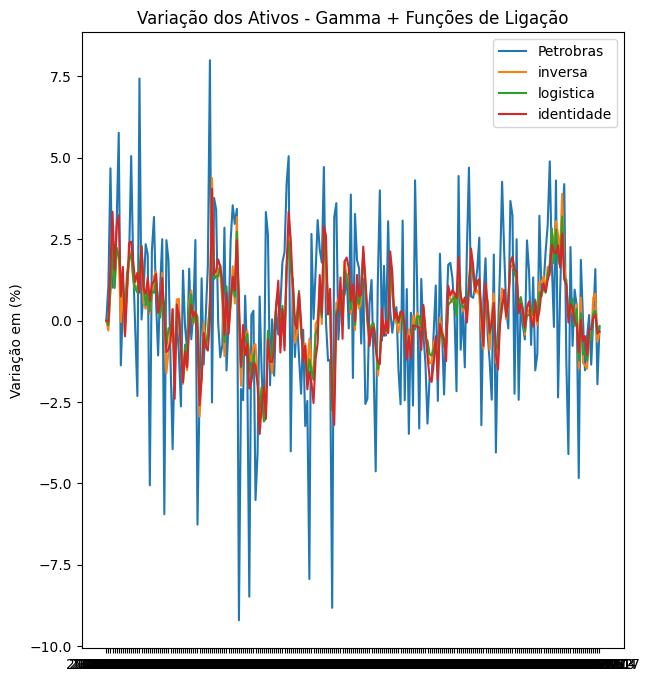

In [40]:
plt.figure(figsize=(7, 8))


plt.plot(df_final['date'], df_final['variation_petro'], label='Petrobras')
plt.plot(df_final['date'], df_final['variation_inversa'], label='inversa')
plt.plot(df_final['date'], df_final['variation_logistica'], label='logistica')
plt.plot(df_final['date'], df_final['variation_identidade'], label='identidade')

# Configurações adicionais do gráfico
plt.ylabel('Variação em (%)')
plt.title('Variação dos Ativos - Gamma + Funções de Ligação')
plt.legend()

# Exibe o gráfico
plt.show()